# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [15]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [16]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [23]:
len(df_raw.index)

400

Answer: 400

#### Question 2. Create a summary table

In [24]:
df_raw.describe()#function

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger range of values so the standard deviation is going to be larger. So the variance between GRE scores is much larger than the variance between GPAs

#### Question 4. Drop data points with missing data


In [25]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: By doing an Isnull() you can check to see where Isnull is equal to true. This means that the value is missing.

In [33]:
df_raw.isnull()


,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


#### Question 6. Create box plots for GRE and GPA

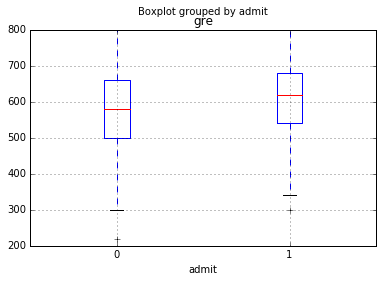

In [59]:
df_raw.boxplot(column='gre',by='admit')

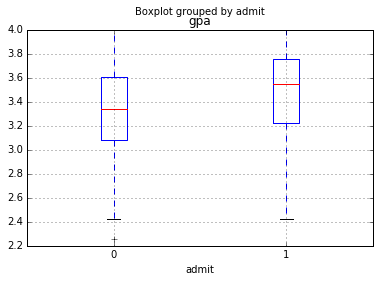

In [60]:
df_raw.boxplot(column='gpa',by='admit')

#### Question 7. What do this plots show?

Answer: since I grouped it by admission, it showing the relationship between GPA and admissions. It is showing clearly that the higher your GPA afects admissions. However, this would need to be combined with additional data because there are students who were not admitted with higher GPAs than students who were admitted. The GRE box plot grouped by GPA shows a smaller variance and higher GRE for those admitted. 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1274f4150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12790dbd0>]], dtype=object)

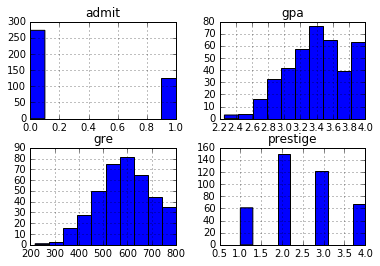

In [69]:
df_raw.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No we would not. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. I do not think Admit will ever be normal since it is either yes or no. For GPA and GRE it is negatively skewed. I would determine if the outliers on the low end of GPA and GRE got in, and assuming they did not, we could remove them from the data set. As it would be unlikely someone with a 200-300 GRE would be admitted, by eliminating these outliers the dataset would become normalized.

#### Question 11. Which of our variables are potentially colinear? 

In [73]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: Nothing is too correlated. Prestiges appears to have a negative correlation with everything else and that would not make sense, but I believe that is because in the data 1 is greater than 4 python does not relaize this. In general nothing is that correlated. It is difficult to say that has GPA increases so will GRE for example. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would want to isolate undergraduate prestige compared to admissions. I would try to standardize GPA by determining a multipler for more prestige schools. For example, Harvard might rank as a 1 on prestige and be harder to have a high GPA as compared to a community college. I would then want to look at like GPAs after the multiplyer has been applied to determine how much the prestige affected. 

#### Question 14. What is your hypothesis? 

Answer: Students that apply from more prestige schools will be admitted at a higher rate than those from less prestige schools after normalizing GPAs.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data